# Visualización de las curvas de Demanda/Consumo

In [6]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
os.getcwd()
data_2 = pd.read_csv("Datos_csv.csv")

## Forma de la Base de Datos

In [6]:
data_2.head()

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
0,1,2017,01-sep,0,1,6872.013385,6976.172363,1
1,2,2017,01-sep,1,2,6660.573651,6709.388672,1
2,3,2017,01-sep,2,3,6504.232961,6568.017090,1
3,4,2017,01-sep,3,4,6435.836442,6502.294434,1
4,5,2017,01-sep,4,5,6437.741557,6384.402344,1


In [7]:
data_2.tail()

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
25147,7628,2020,14-jul,19,20,8223.639187,8415.004883,3
25148,7629,2020,14-jul,20,21,8241.447436,8194.292969,3
25149,7630,2020,14-jul,21,22,8604.842271,8556.683594,3
25150,7631,2020,14-jul,22,23,8519.651856,8560.400391,3
25151,7632,2020,14-jul,23,24,8279.839812,8508.864258,3


## Información general del conjunto

In [8]:
data_2.describe()

,muestras,anio,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
count,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000
mean,4209.362595,2018.605797,11.500000,12.500000,7745.438583,7734.933778,1.955153
std,2448.412619,0.919625,6.922324,6.922324,974.363777,977.956108,0.806060
min,1.000000,2017.000000,0.000000,1.000000,4288.339301,4230.882324,1.000000
25%,2096.750000,2018.000000,5.750000,6.750000,7011.455212,6998.106567,1.000000
50%,4192.500000,2019.000000,11.500000,12.500000,7807.317117,7794.049072,2.000000
75%,6288.250000,2019.000000,17.250000,18.250000,8484.490007,8478.522950,3.000000
max,8760.000000,2020.000000,23.000000,24.000000,10567.494660,11267.710940,3.000000


### Datos relevantes:

- 25,152 registros horaios de la demanda y su respectivo consumo
- Periodo de las muestras recolectadas (01-sep-2017 a 14-jul-2020)
- Demandas máximas del periodo:
  > 10,567 MWh (integrada)
  > 11,267 MW  (instantánea)
- Demandas mínimas del periodo:
  > 4,288 MWh (integrada)
  > 4,230 MW  (instantánea)
- Demandas promedio del periodo:
  > 7, MWh (integrada)
  > 4,230 MW  (instantánea)

<Figure size 1800x720 with 0 Axes>

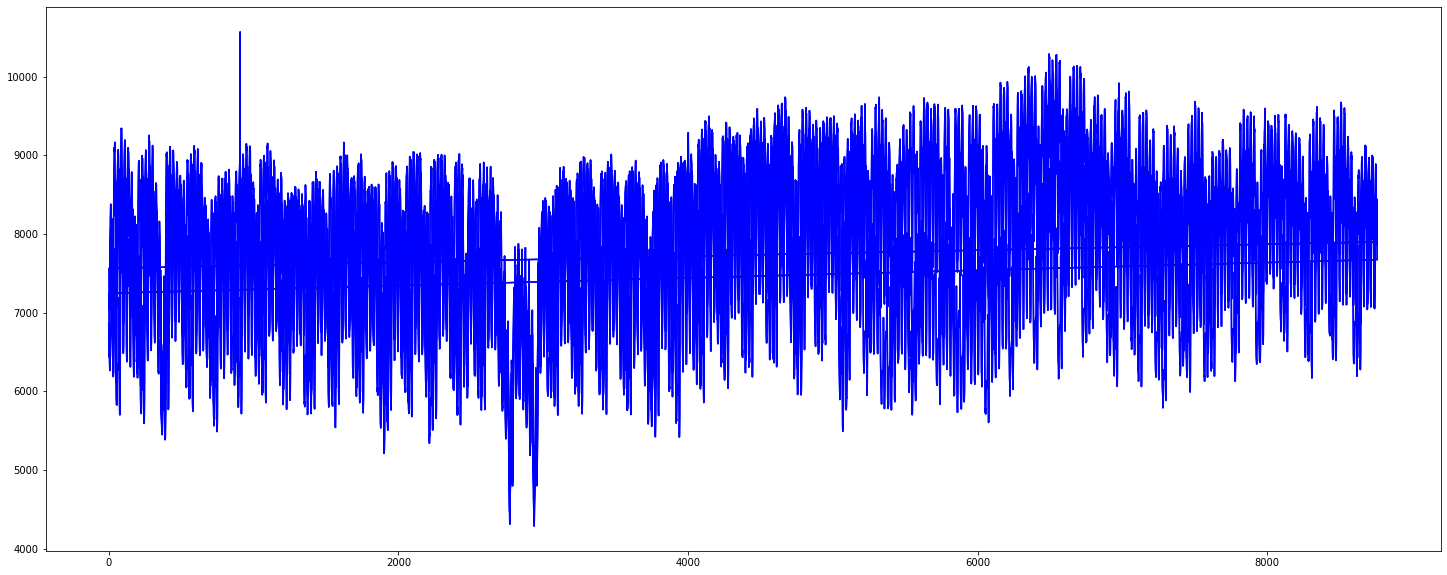

In [12]:
graf1 = plt.figure(figsize=(25,10))
graf1 = plt.plot(data_2.muestras, data_2.dema_int, 'b-')

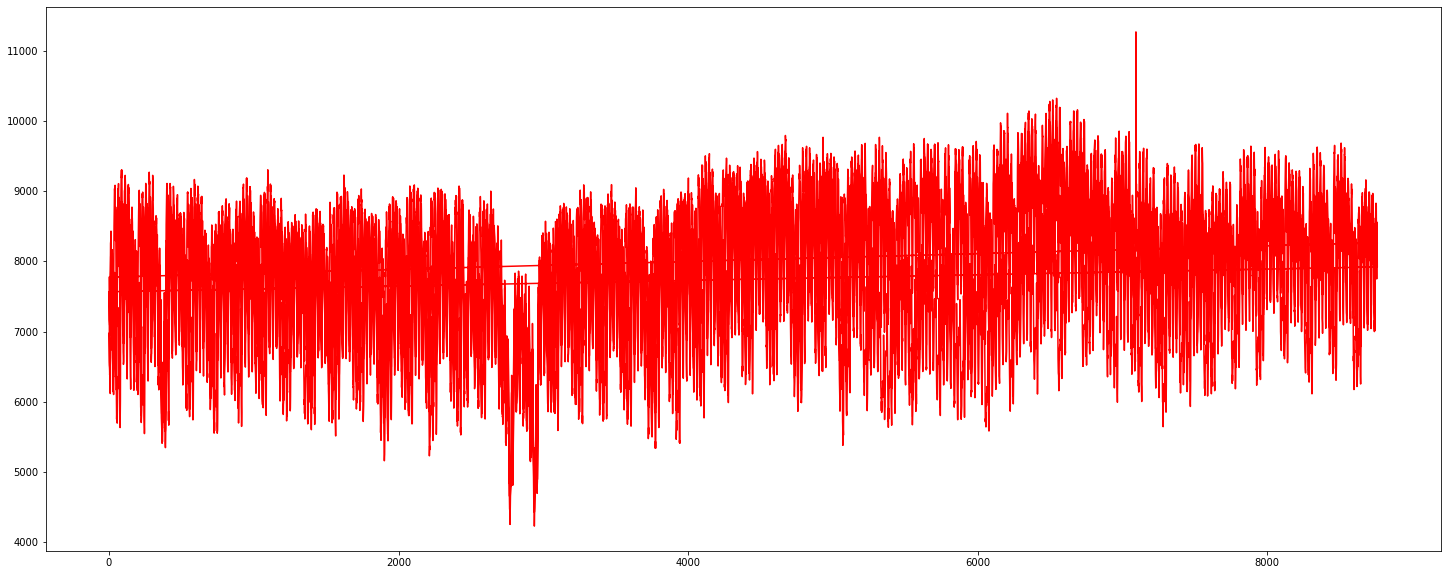

In [14]:
graf2 = plt.figure(figsize=(25,10))
graf2 = plt.plot(data_2.muestras, data_2.dem_inst, 'r-')

## Obteniendo valores representativos de diferentes periodos

### Considerando valores por día (cada 24 muestras horarias)

In [64]:
n_datos = len(data_2.muestras)
rango = 1*24 # (número de muestras horarias en el periodo de 1 día = 24 horas)
aux = round(len(data_2.muestras)/rango)-1
print(" Muestras > muestras en subperiodos? \n", n_datos > rango*aux) # Para saber el número de datos que se utilizarían
print(" Muestras faltantes: ", n_datos-rango*aux, "\n Subperiodos considerados: ", aux)

 Muestras > muestras en subperiodos? 
 True
 Muestras faltantes:  24 
 Subperiodos considerados:  1047


Recopilando la información por subperiodo, considerando:
+ Valor Máximo
+ Promedio
+ Valor Mínimo

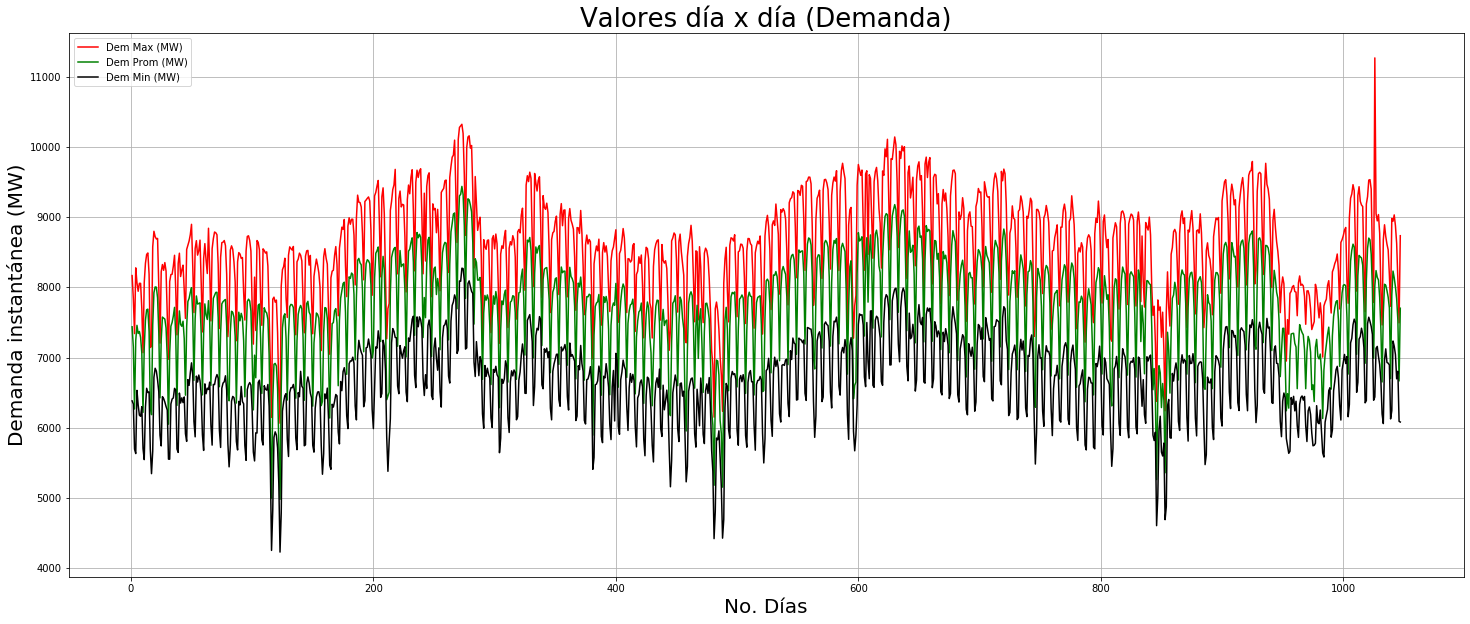

In [65]:
# Arreglos con las demandas integradas máxima, promedios y mínimas del rango seleccionado
max_itg = []
prom_itg = []
min_itg = []

dem_sub = []

# Arreglos con las demandas instantáneas máxima, promedios y mínimas del rango seleccionado
max_ins = []
prom_ins = []
min_ins = []
aux2 = 0

for i in range(aux):
    piv = []
    piv2 = []
    for k in range(rango):
        piv.append(data_2.dema_int[aux2])
        piv2.append(data_2.dem_inst[aux2])
        aux2 = aux2 + 1
    max_itg.append(max(piv))
    min_itg.append(min(piv))
    prom_itg.append(np.array(piv).mean())
    dem_sub.append(sum(piv)/1000) # En GWh
    max_ins.append(max(piv2))
    min_ins.append(min(piv2))
    prom_ins.append(np.array(piv2).mean())
    
x_d = np.linspace(1, len(max_ins), len(max_ins))
dia = plt.figure(figsize=(25,10))
dia = plt.plot(x_d, max_ins, 'r-',
               x_d, prom_ins, 'g-',
               x_d, min_ins, 'k-')
dia = plt.legend(['Dem Max (MW)','Dem Prom (MW)','Dem Min (MW)'], loc='best')
dia = plt.title("Valores día x día (Demanda)", fontsize = 26, color ='k')
dia = plt.xlabel('No. Días', fontsize = 20, color = "k")
dia = plt.ylabel('Demanda instantánea (MW)', fontsize= 20, color = "k")
dia = plt.grid(True)

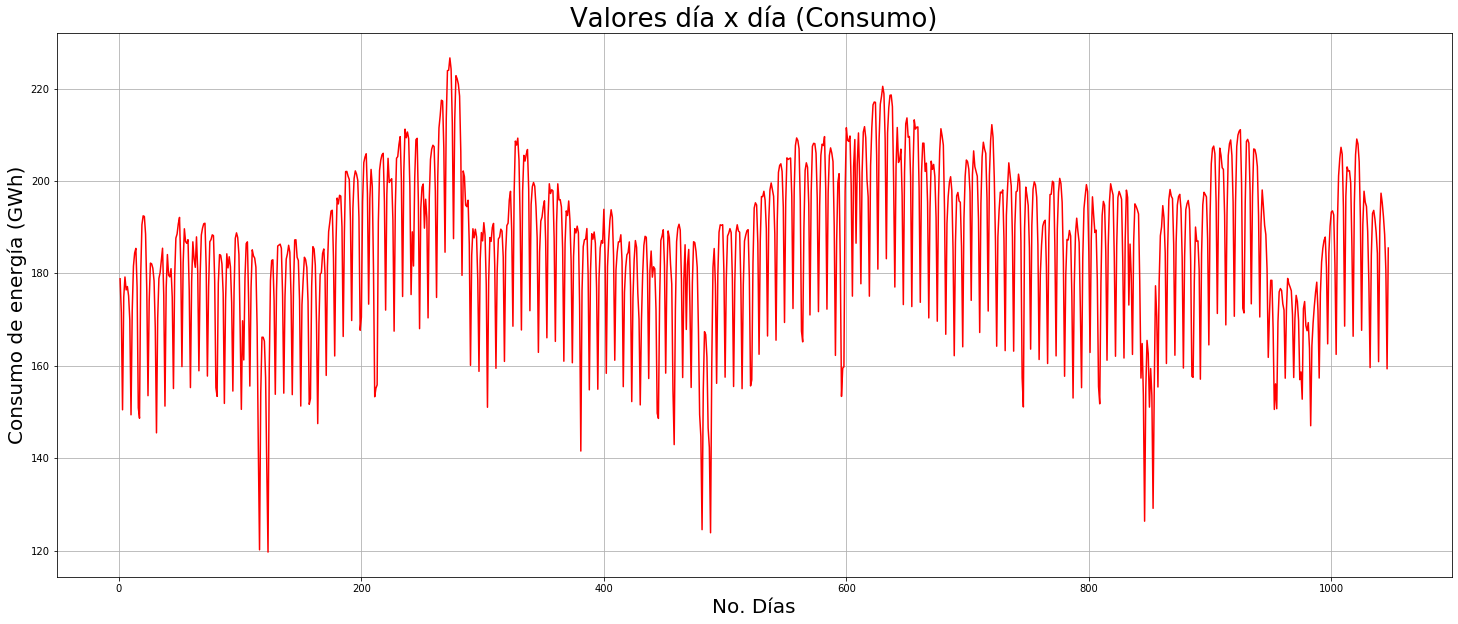

In [67]:
dia2 = plt.figure(figsize=(25,10))
dia2 = plt.plot(x_d, dem_sub, 'r-')
dia2 = plt.title("Valores día x día (Consumo)", fontsize = 26, color ='k')
dia2 = plt.xlabel('No. Días', fontsize = 20, color = "k")
dia2 = plt.ylabel('Consumo de energía (GWh)', fontsize= 20, color = "k")
dia2 = plt.grid(True)

### Considerando valores por semana (cada 7 días)

In [68]:
n_datos = len(data_2.muestras)
rango = 7*24 # (número de muestras horarias en el periodo de 7 días = 1 semana)
aux = round(len(data_2.muestras)/rango)-1
print(" Muestras > muestras en subperiodos? \n", n_datos > rango*aux) # Para saber el número de datos que se utilizarían
print(" Muestras faltantes: ", n_datos-rango*aux, "\n Subperiodos considerados: ", aux)

 Muestras > muestras en subperiodos? 
 True
 Muestras faltantes:  120 
 Subperiodos considerados:  149


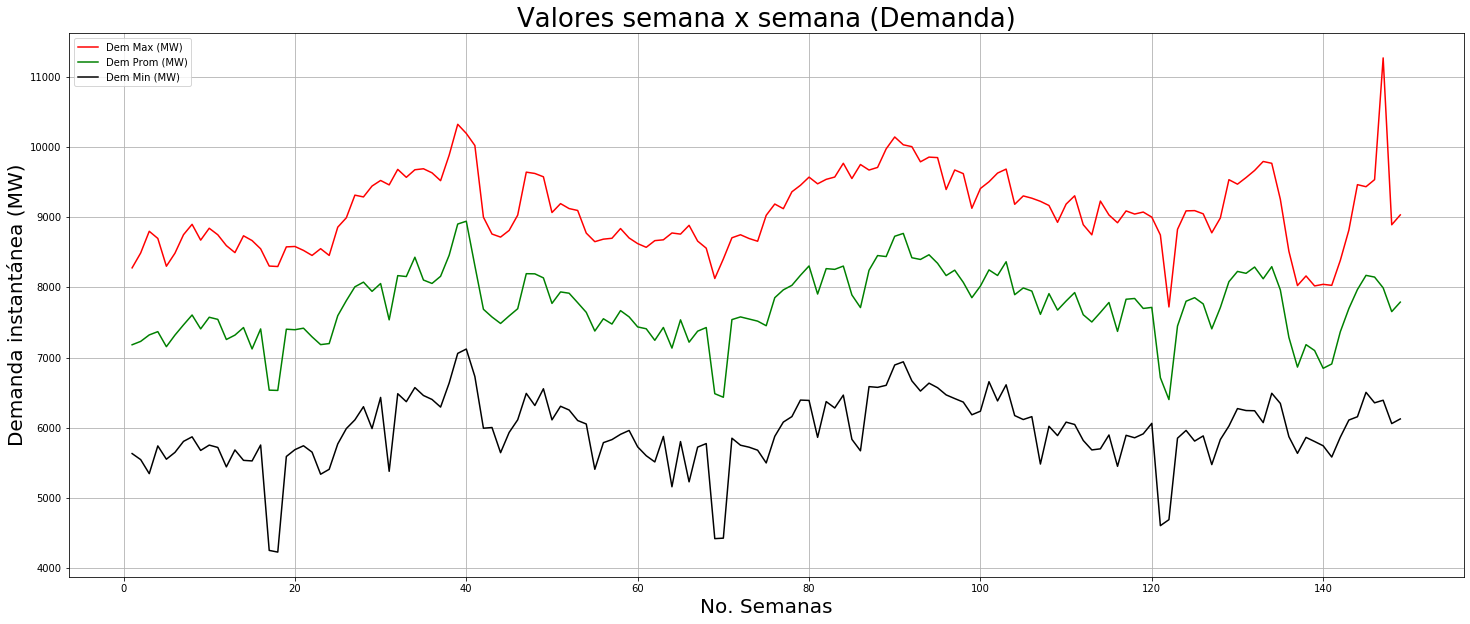

In [69]:
# Arreglos con las demandas integradas máxima, promedios y mínimas del rango seleccionado
max_itg = []
prom_itg = []
min_itg = []

dem_sub = []

# Arreglos con las demandas instantáneas máxima, promedios y mínimas del rango seleccionado
max_ins = []
prom_ins = []
min_ins = []
aux2 = 0

for i in range(aux):
    piv = []
    piv2 = []
    for k in range(rango):
        piv.append(data_2.dema_int[aux2])
        piv2.append(data_2.dem_inst[aux2])
        aux2 = aux2 + 1
    max_itg.append(max(piv))
    min_itg.append(min(piv))
    prom_itg.append(np.array(piv).mean())
    dem_sub.append(sum(piv)/1000)
    max_ins.append(max(piv2))
    min_ins.append(min(piv2))
    prom_ins.append(np.array(piv2).mean())
    
x_d = np.linspace(1, len(max_ins), len(max_ins))
sem = plt.figure(figsize=(25,10))
sem = plt.plot(x_d, max_ins, 'r-',
               x_d, prom_ins, 'g-',
               x_d, min_ins, 'k-')
sem = plt.legend(['Dem Max (MW)','Dem Prom (MW)','Dem Min (MW)'], loc='best')
sem = plt.title("Valores semana x semana (Demanda)", fontsize = 26, color ='k')
sem = plt.xlabel('No. Semanas', fontsize = 20, color = "k")
sem = plt.ylabel('Demanda instantánea (MW)', fontsize= 20, color = "k")
sem = plt.grid(True)

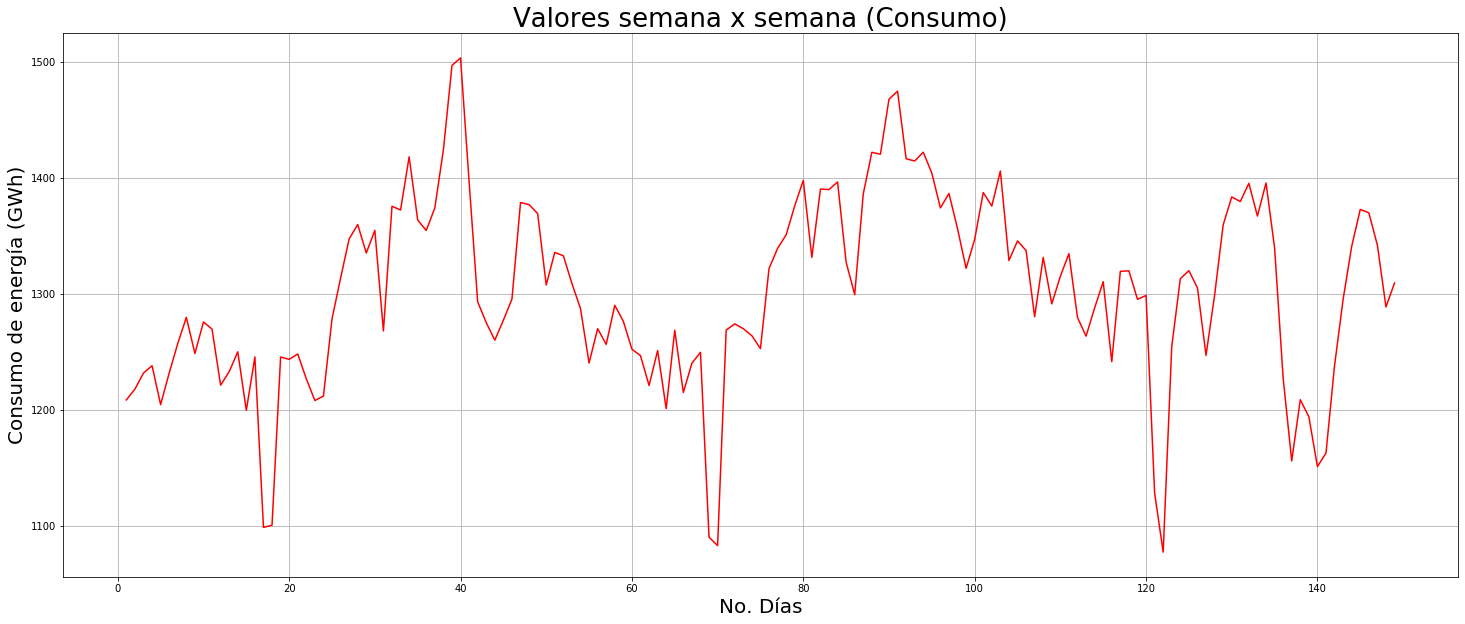

In [71]:
sem2 = plt.figure(figsize=(25,10))
sem2 = plt.plot(x_d, dem_sub, 'r-')
sem2 = plt.title("Valores semana x semana (Consumo)", fontsize = 26, color ='k')
sem2 = plt.xlabel('No. Días', fontsize = 20, color = "k")
sem2 = plt.ylabel('Consumo de energía (GWh)', fontsize= 20, color = "k")
sem2 = plt.grid(True)

### Considerando valores cada 30 días (~ cada mes)

In [72]:
n_datos = len(data_2.muestras)
rango = 30*24 # (número de muestras horarias en el periodo de 7 días = 1 semana)
aux = round(len(data_2.muestras)/rango)-1
print(" Muestras > muestras en subperiodos? \n", n_datos > rango*aux) # Para saber el número de datos que se utilizarían
print(" Muestras faltantes: ", n_datos-rango*aux, "\n Subperiodos considerados: ", aux)

 Muestras > muestras en subperiodos? 
 True
 Muestras faltantes:  672 
 Subperiodos considerados:  34


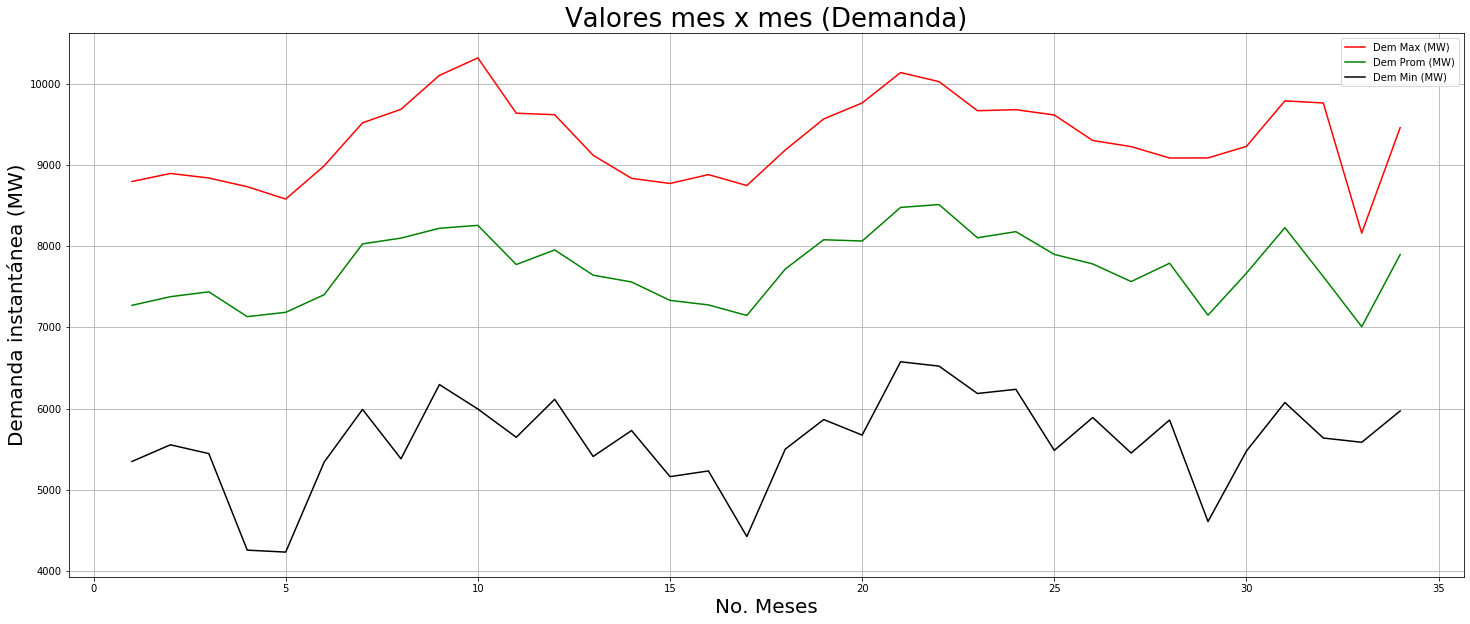

In [75]:
# Arreglos con las demandas integradas máxima, promedios y mínimas del rango seleccionado
max_itg = []
prom_itg = []
min_itg = []

dem_sub = []

# Arreglos con las demandas instantáneas máxima, promedios y mínimas del rango seleccionado
max_ins = []
prom_ins = []
min_ins = []
aux2 = 0

for i in range(aux):
    piv = []
    piv2 = []
    for k in range(rango):
        piv.append(data_2.dema_int[aux2])
        piv2.append(data_2.dem_inst[aux2])
        aux2 = aux2 + 1
    max_itg.append(max(piv))
    min_itg.append(min(piv))
    prom_itg.append(np.array(piv).mean())
    dem_sub.append(sum(piv)/1000)
    max_ins.append(max(piv2))
    min_ins.append(min(piv2))
    prom_ins.append(np.array(piv2).mean())
    
x_d = np.linspace(1, len(max_ins), len(max_ins))
mes = plt.figure(figsize=(25,10))
mes = plt.plot(x_d, max_ins, 'r-',
               x_d, prom_ins, 'g-',
               x_d, min_ins, 'k-')
mes = plt.legend(['Dem Max (MW)','Dem Prom (MW)','Dem Min (MW)'], loc='best')
mes = plt.title("Valores mes x mes (Demanda)", fontsize = 26, color ='k')
mes = plt.xlabel('No. Meses', fontsize = 20, color = "k")
mes = plt.ylabel('Demanda instantánea (MW)', fontsize= 20, color = "k")
mes = plt.grid(True)

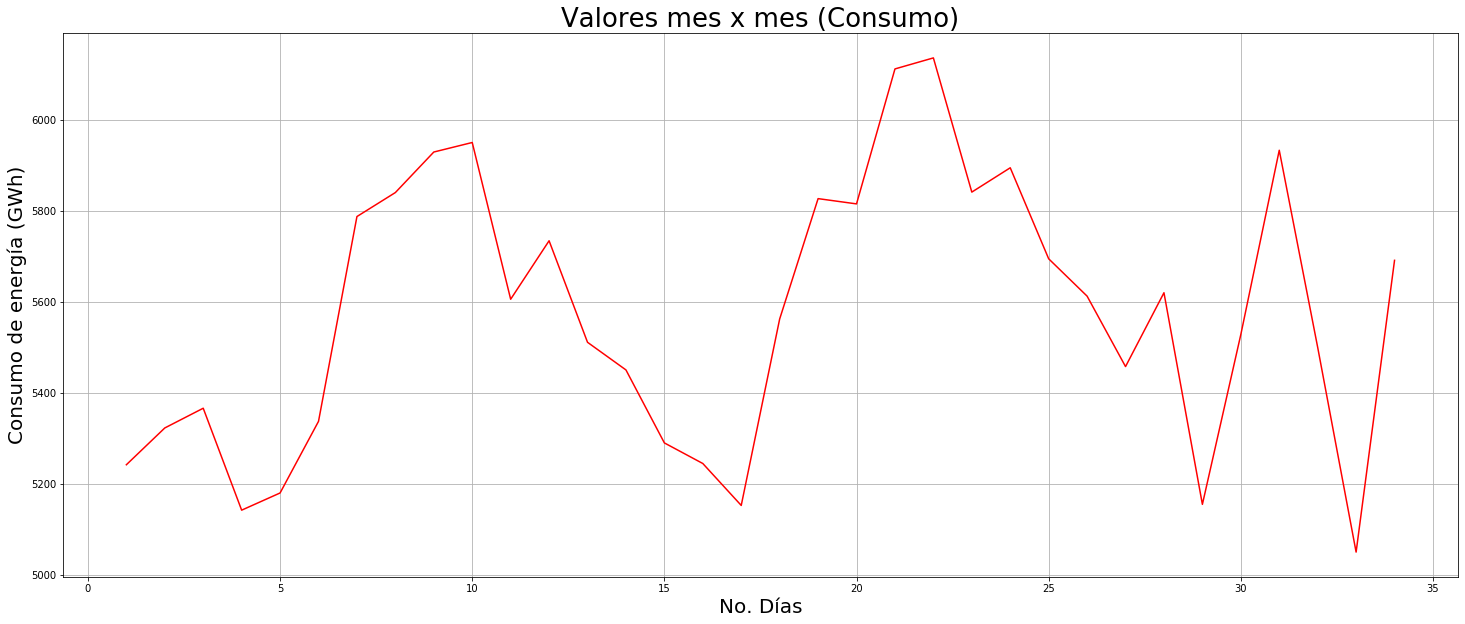

In [76]:
mes2 = plt.figure(figsize=(25,10))
mes2 = plt.plot(x_d, dem_sub, 'r-')
mes2 = plt.title("Valores mes x mes (Consumo)", fontsize = 26, color ='k')
mes2 = plt.xlabel('No. Días', fontsize = 20, color = "k")
mes2 = plt.ylabel('Consumo de energía (GWh)', fontsize= 20, color = "k")
mes2 = plt.grid(True)